 ecart entre R_opt et R_theo = 0.09320717372375564


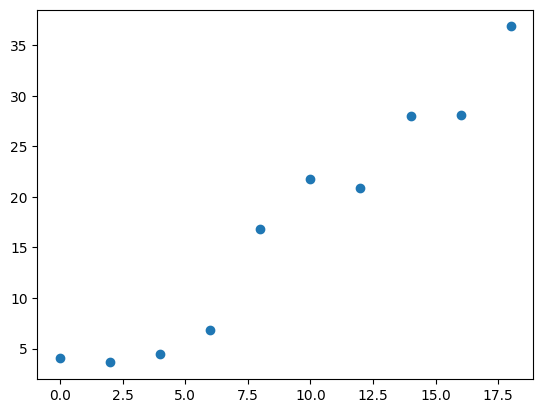

In [3]:
# EXERCICE 2.1
import numpy as np
import matplotlib.pyplot as plt

R = 2
n = 10
I = np.arange(0,2*n,2)
sigma_BB = 2

U = R*I + sigma_BB*np.random.randn(n)

plt.scatter(I,U)

# On veut minimiser ||U - RI||²

#On a R_opt = (1 / ||I||² ) * <I , U>
R_opt = ( 1 / np.linalg.norm(I) ** 2 ) * np.dot(I , U)
print (f" ecart entre R_opt et R_theo = {R - R_opt}")


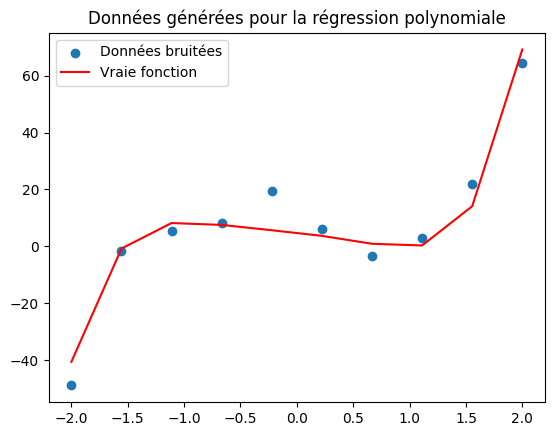

In [ ]:
#EXercice 2.2

#1.
p = 5
n = 10
sigma_BB = 5

A = np.random.randn(p + 1) * 5
X = np.linspace(-2, 2, n)
P_X = sum(A[k] * X**k for k in range(p + 1)) # = y_true

Y_obs = P_X + np.random.normal(0, sigma_BB, n)

plt.scatter(X, Y_obs, label="Données bruitées")
plt.plot(X, P_X, label="Vraie fonction", color="red")
plt.legend()
plt.title("Données générées pour la régression polynomiale")
plt.show()

Coefficients estimés du polynôme : [-6.68336943  5.64004327 -3.63331292  3.58350431  5.48582905 -5.27648486]


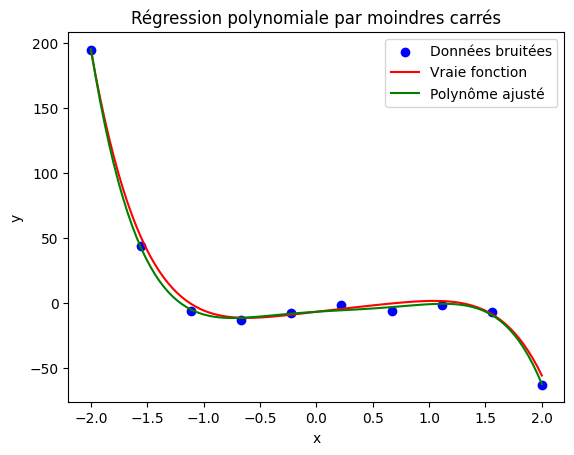

In [ ]:
#2.

V = np.array([[xi**k for k in range(p+1)] for xi in X])
A_hat = (np.linalg.inv(V.T @ V)) @  (V.T @ Y_obs)
print("Coefficients estimés du polynôme :", A_hat)

X_estim = np.linspace(-2, 2, 100)
Y_estim = sum(A_hat[k] * X_estim**k for k in range(p + 1)) 
X_true = np.linspace(-2,2, 100)
Y_true = sum(A[k] * X_true**k for k in range(p+1))


plt.scatter(X, Y_obs, label="Données bruitées", color="b")
plt.plot(X_true, Y_true, label="Vraie fonction" , color='r')
plt.plot(X_estim, Y_estim, label="Polynôme ajusté", color="green")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Régression polynomiale par moindres carrés")
plt.show()


In [ ]:
#Le problème a-t-il une solution ? Cette solution est elle unique ?
#Oui il y a toujours une solution car le système à plus d'équation que d'incconue. Si XtX est inversible cette solution est unique

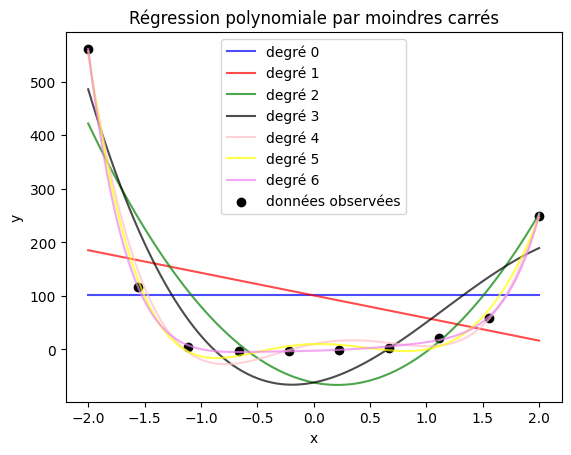

Le meilleur degré du polynôme est 6 avec une erreur de 58.295958387074506
Polynôme obtenu :
           6             5       4     3       2
3.083e-06 x + 2.387e-06 x + 0.3 x - 4 x + 0.3 x - 1 x + 2


In [53]:
n = 10
degre = 6
sigma_BB = 5
A = np.random.randn(6 + 1) * 5
X = np.linspace(-2, 2, n)
X_plot = np.linspace(-2, 2, 100)
P_X = sum(A[k] * X**k for k in range(p + 1))
Y_obs = P_X + np.random.normal(0, sigma_BB, n) # Les valeurs bruitées, qui sont observées
    

Deg = np.arange(degre + 1)
couleur = ['b', 'r' , 'green' , 'black' , 'pink' , 'yellow', 'violet']
errors = []

for p ,c in zip(Deg,couleur) :
    V = np.array([[xi**k for k in range(p+1)] for xi in X])
    A_hat = (np.linalg.inv(V.T @ V)) @  (V.T @ Y_obs)
    Y_estim = sum(A_hat[k] * X**k for k in range(p + 1)) 
    Y_estim_plot = sum(A_hat[k] * X_plot**k for k in range(p + 1)) 

    error = np.sum((Y_obs - Y_estim) ** 2)
    errors.append(error)
    

    plt.plot(X_plot, Y_estim_plot, color=c, alpha=0.7, label=f"degré {p}")


plt.scatter(X, Y_obs, label= f"données observées", color='black')
plt.title("Régression polynomiale par moindres carrés")   
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

best_degree = Deg[np.argmin(errors)]
best_error = min(errors)

# Comparaison avec numpy.polyfit
best_poly_coefs = np.polyfit(x, y, best_degree)
best_poly = np.poly1d(best_poly_coefs)

print(f"Le meilleur degré du polynôme est {best_degree} avec une erreur de {best_error}")
print(f"Polynôme obtenu :\n{best_poly}")


In [46]:
#Exercice 2.3

#Données fournies dasn le poly
x = np.array([-2.6605, -2.5024, -2.4075, -2.0656, -1.2418, -1.1105,
-1.0194, -0.8459, -0.8403, -0.4906, 0.7695, 0.8933, 1.0023,
1.5085, 2.3193])
y =np.array([ 97.1414, 80.8250, 72.0406, 46.0602, 12.0776, 9.4146,
7.8925, 5.6353, 5.5751, 3.0525, -0.3093, -1.3142, -2.4258,
-11.0032, -39.9284])

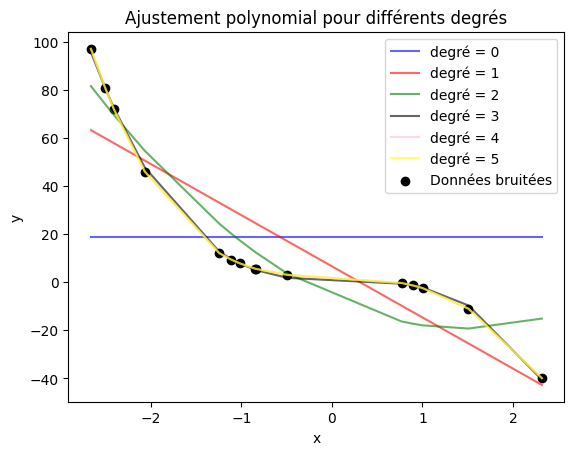

Le meilleur degré du polynôme est 6 avec une erreur de 58.295958387074506 

Polynôme obtenu :
           6             5       4     3       2
3.083e-06 x + 2.387e-06 x + 0.3 x - 4 x + 0.3 x - 1 x + 2


In [57]:
degres = np.arange(7)
n = len(x)
couleur = ['b', 'r' , 'green' , 'black' , 'pink' , 'yellow', 'violet']

for p, c in  zip(degrés, couleur) :
    V = np.array([[xi**k for k in range(p+1)] for xi in x])
    A_hat = (np.linalg.inv(V.T @ V)) @  (V.T @ y)
    y_estim = sum(A_hat[k] * x**k for k in range(p + 1)) 
    plt.plot(x ,y_estim, label=f"degré = {p}", color =c, alpha = 0.6)
    

plt.scatter(x, y, label="Données bruitées", color="black")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Ajustement polynomial pour différents degrés")
plt.legend()
plt.show()

# Trouver le meilleur degré en fonction de l'erreur minimale
best_degree = degres[np.argmin(errors)]
best_error = min(errors)

# Comparaison avec numpy.polyfit
best_poly_coefs = np.polyfit(x, y, best_degree)
best_poly = np.poly1d(best_poly_coefs)

print(f"Le meilleur degré du polynôme est {best_degree} avec une erreur de {best_error} \n")
print(f"Polynôme obtenu :\n{best_poly}")
